In [14]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor = "val_loss", mode = "min", patience = 5)

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
EPOCHS = 20

es = EarlyStopping(monitor = "val_loss", mode = "min", patience = 5)

In [2]:
#czemu ta komórka jest istotna?
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# 255 bo to jest największa wartość w tym zbiorze, więc jak podzielimy na 255 to będzie miała 1, tak jak chcemy
# dajemu mu znać, że po zamianie chcemy dostać liczbę zmiennoprzecinkową

In [9]:
#stwórz sieć neuronową. Pierwsza warstwa już jest. Następnie dodaj warstwę Dense o 128 neuronach i funkcji aktywacji
#relu. Ostatnia warstwa, też Dense, powinna mieć neuronów tyle ile jest klas w zbiorze y_train i funkcję aktywacji
#softmax. Funkcja straty to tym razem 'sparse_categorical_crossentropy'

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# flatten zamienia nam dwuwymiarowy 28x28 na jedno (784)
# funkcje straty w tenorflow
#     jeśli label to cyfry, np od 0-9 i przykładowy label wygląda np [7]
#     to kożystamy ze 'sparse_categorical_crossentropy' i wtedy funkcja aktywacji w ostatniej 
#     warstwie musi być softmax
    
#     categorical crossentropy
#     jeśli są w formie np [0,0,0,0,0,0,1,0,0] czyli tam gdzie jest jedynka pojawia się kolejny label.
#     Tu funkcją aktywacji będzie: softmax
        
#     binary
#     label jest w formie 1 lub 0, np [0] o wtedy
#     funkcją aktywacji będzie signoid

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
#uruchom uczenie sieci
history = model.fit(x_train, y_train, epochs = EPOCHS, validation_data=(x_test, y_test), callbacks = [es])

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 2.7506 - accuracy: 0.8453 - val_loss: 0.5041 - val_accuracy: 0.8778
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4152 - accuracy: 0.8992 - val_loss: 0.3751 - val_accuracy: 0.9160
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3047 - accuracy: 0.9231 - val_loss: 0.3039 - val_accuracy: 0.9269
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2634 - accuracy: 0.9329 - val_loss: 0.2763 - val_accuracy: 0.9408
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2310 - accuracy: 0.9418 - val_loss: 0.2897 - val_accuracy: 0.9372
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2188 - accuracy: 0.9463 - val_loss: 0.2702 - val_accuracy: 0.9430
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2005 - accuracy: 0.9501 - val_loss: 0.2800 - val_accuracy:

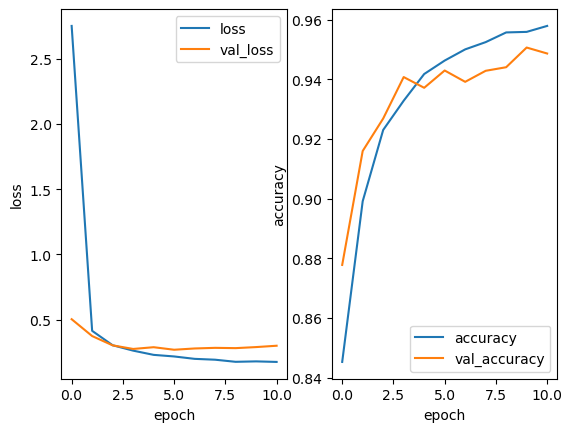

In [16]:
#przygotuj wykresy funkcji straty i skuteczności
hist = pd.DataFrame(history.history)

plt.subplot(1, 2, 1)
#1 liczba - ile wierszy wykresów będzie
#2 liczba - ile kolumn wykresów będzie
#3 liczba - który wykres definiujemy
plt.plot(hist.loss, label = "loss")
plt.plot(hist.val_loss, label = "val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist.accuracy, label = "accuracy")
plt.plot(hist.val_accuracy, label = "val_accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")


plt.legend()

In [17]:
y_pred = model.predict(x_test)

# wrzuciłem do modelu dane testowe i stworzyłem jakby nowe wart które odpowiadają predykcji

313/313 [==============================] - 0s 1ms/step


[0.0000000e+00 2.0367639e-20 2.0248838e-09 1.8863981e-17 1.1173211e-25
 0.0000000e+00 0.0000000e+00 1.0000000e+00 1.8470682e-34 6.0919433e-18]


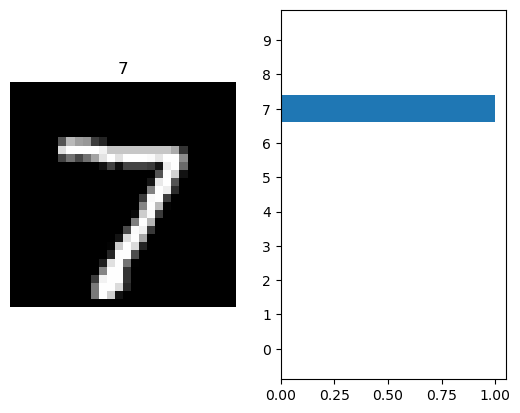

In [18]:
plt.subplot(1,2,1)
plt.imshow(x_test[0], cmap="gray")
plt.axis('off')
plt.title(y_test[0])

plt.subplot(1,2,2)
plt.barh(np.arange(10), y_pred[0])
plt.yticks(np.arange(10))
print(y_pred[0])

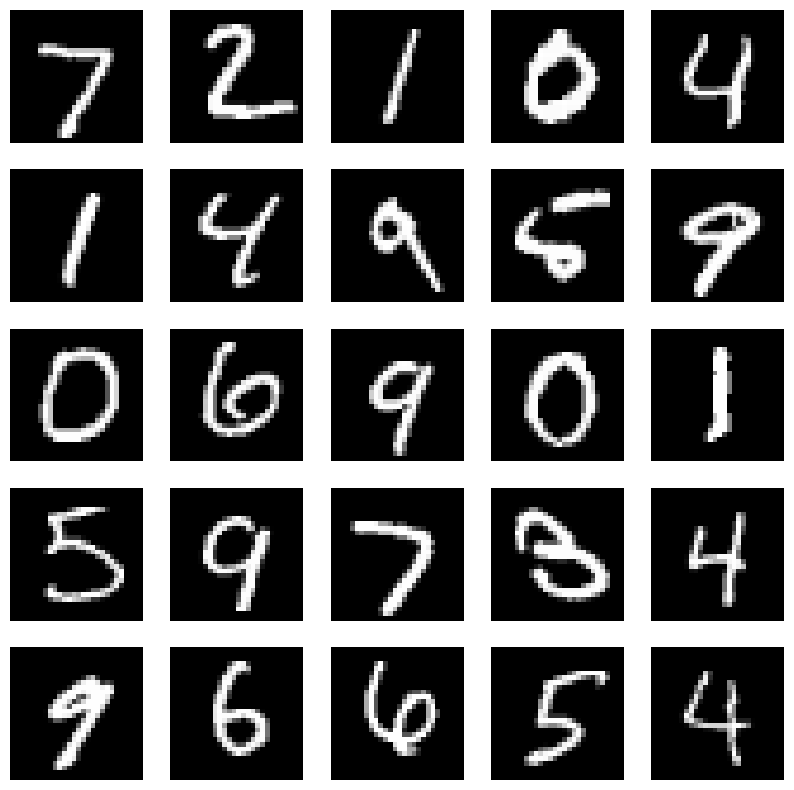

In [19]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.axis('off')

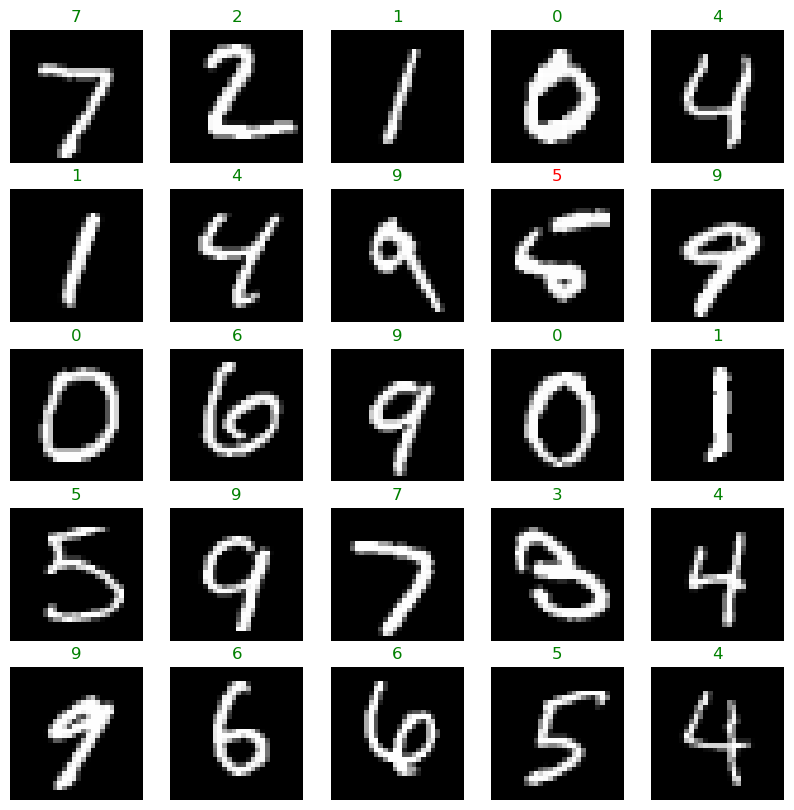

In [20]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.axis('off')
    if np.argmax(y_pred[i]) == y_test[i]:
        plt.title(y_test[i], color = 'green')
    else:
        plt.title(y_test[i], color = 'red')